<a href="https://colab.research.google.com/github/rnjt13/RNN_using_different_word_encodings/blob/main/RNN_sentiment_analysis_using_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [27]:
  # sample data to see how tokenization works
  docs = ['go india',
		'india india',
		'hip hip hurray',
		'jeetega bhai jeetega india jeetega',
		'bharat mata ki jai',
		'kohli kohli',
		'sachin sachin',
		'dhoni dhoni',
		'modi ji ki jai',
		'inquilab zindabad']

In [28]:
# define out of vocabulary tokens as NA
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

In [29]:
# convert words to token in docs
tokenizer.fit_on_texts(docs)
len(tokenizer.word_index)

17

In [30]:
# total words
# len(tokenizer.word_index)

In [31]:
# check the frequency of words
# tokenizer.word_counts

In [32]:
# count of no. of sentences
# tokenizer.document_count

In [33]:
# convert sequence of words to sequence of numbers in docs
sequences = tokenizer.texts_to_sequences(docs)
sequences

[[9, 1],
 [1, 1],
 [3, 3, 10],
 [2, 11, 2, 1, 2],
 [12, 13, 4, 5],
 [6, 6],
 [7, 7],
 [8, 8],
 [14, 15, 4, 5],
 [16, 17]]

In [34]:
# pad these seqeunces to a fixed max length
from keras.utils import pad_sequences
sequences = pad_sequences(sequences,padding='post')
sequences

array([[ 9,  1,  0,  0,  0],
       [ 1,  1,  0,  0,  0],
       [ 3,  3, 10,  0,  0],
       [ 2, 11,  2,  1,  2],
       [12, 13,  4,  5,  0],
       [ 6,  6,  0,  0,  0],
       [ 7,  7,  0,  0,  0],
       [ 8,  8,  0,  0,  0],
       [14, 15,  4,  5,  0],
       [16, 17,  0,  0,  0]], dtype=int32)

In [35]:
# Convert the padded sequences into embeddings and then use these embeddings as input to build a sentiment analysis model
from keras import Sequential
from keras.datasets import imdb
from keras.layers import Dense,SimpleRNN,Flatten,Embedding

In [39]:
model = Sequential()
model.add(Embedding(18,output_dim=2,input_length=5))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 5, 2)              36        
                                                                 
Total params: 36 (144.00 Byte)
Trainable params: 36 (144.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model.compile(optimizer='adam',metrics=['accuracy'])

In [41]:
pred = model.predict(sequences)
print(pred)

1/1 [==============================] - 0s 40ms/step
[[[ 0.01673615  0.00349313]
  [ 0.0254714   0.03154382]
  [ 0.03531635 -0.01879068]
  [ 0.03531635 -0.01879068]
  [ 0.03531635 -0.01879068]]

 [[ 0.0254714   0.03154382]
  [ 0.0254714   0.03154382]
  [ 0.03531635 -0.01879068]
  [ 0.03531635 -0.01879068]
  [ 0.03531635 -0.01879068]]

 [[ 0.02487662 -0.03197522]
  [ 0.02487662 -0.03197522]
  [ 0.0097909   0.02685486]
  [ 0.03531635 -0.01879068]
  [ 0.03531635 -0.01879068]]

 [[-0.02486453 -0.03242819]
  [ 0.04441664  0.01511158]
  [-0.02486453 -0.03242819]
  [ 0.0254714   0.03154382]
  [-0.02486453 -0.03242819]]

 [[-0.04011302 -0.00992996]
  [ 0.02249539 -0.01525316]
  [ 0.03307484 -0.01799235]
  [-0.01565104  0.01738249]
  [ 0.03531635 -0.01879068]]

 [[-0.02554873  0.01667063]
  [-0.02554873  0.01667063]
  [ 0.03531635 -0.01879068]
  [ 0.03531635 -0.01879068]
  [ 0.03531635 -0.01879068]]

 [[-0.01662321 -0.02762424]
  [-0.01662321 -0.02762424]
  [ 0.03531635 -0.01879068]
  [ 0.035316

In [42]:
# Build the SimpleRNN model using embedded data

In [43]:
#load imdb data
(X_train,y_train), (X_test,y_test) = imdb.load_data()

In [44]:
X_train[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [45]:
# find max length of sentence
max_len = len(X_train[0])
print('max_length[0] = {}'.format(max_len))
for i in range(len(X_train)):
  if max_len< len(X_train[i]):
    max_len= len(X_train[i])
print('max_length = {}'.format(max_len))

max_length[0] = 218
max_length = 2494


In [46]:
X_train = pad_sequences(X_train,padding='post',maxlen=50)
X_test = pad_sequences(X_test,padding='post',maxlen=50)
X_train[0]

array([2071,   56,   26,  141,    6,  194, 7486,   18,    4,  226,   22,
         21,  134,  476,   26,  480,    5,  144,   30, 5535,   18,   51,
         36,   28,  224,   92,   25,  104,    4,  226,   65,   16,   38,
       1334,   88,   12,   16,  283,    5,   16, 4472,  113,  103,   32,
         15,   16, 5345,   19,  178,   32], dtype=int32)

In [47]:
print(X_train.shape,X_test.shape)

(25000, 50) (25000, 50)


In [51]:
#Build a simple RNN model on this embedded data
# Add Embedding layer to convert each word into 2 dim vector
# Add a layer of SimpleRNN,
# input shape will be (50,1) as max_length of input is set as 50
# retyrn_sequences will be False as output after every timestamp is not required. [This is required in Entity recognition or Language translation]

model = Sequential()

model.add(Embedding(100000, output_dim=2,input_length=50))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(1,activation='sigmoid')) # as this is a binary classification problem

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 50, 2)             200000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                1120      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 201153 (785.75 KB)
Trainable params: 201153 (785.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
X_test[0]

array([  394,   354,     4,   123,     9,  1035,  1035,  1035,    10,
          10,    13,    92,   124,    89,   488,  7944,   100,    28,
        1668,    14,    31,    23,    27,  7479,    29,   220,   468,
           8,   124,    14,   286,   170,     8,   157,    46,     5,
          27,   239,    16,   179, 15387,    38,    32,    25,  7944,
         451,   202,    14,     6,   717], dtype=int32)

In [53]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
782/782 [==============================] - 17s 20ms/step - loss: 0.6796 - acc: 0.5566 - val_loss: 0.5700 - val_acc: 0.7155
Epoch 2/5
782/782 [==============================] - 14s 18ms/step - loss: 0.4264 - acc: 0.8022 - val_loss: 0.4255 - val_acc: 0.8063
Epoch 3/5
782/782 [==============================] - 17s 21ms/step - loss: 0.2635 - acc: 0.8954 - val_loss: 0.5054 - val_acc: 0.8005
Epoch 4/5
782/782 [==============================] - 17s 22ms/step - loss: 0.1688 - acc: 0.9373 - val_loss: 0.5369 - val_acc: 0.7905
Epoch 5/5
782/782 [==============================] - 17s 22ms/step - loss: 0.1137 - acc: 0.9610 - val_loss: 0.7373 - val_acc: 0.7853


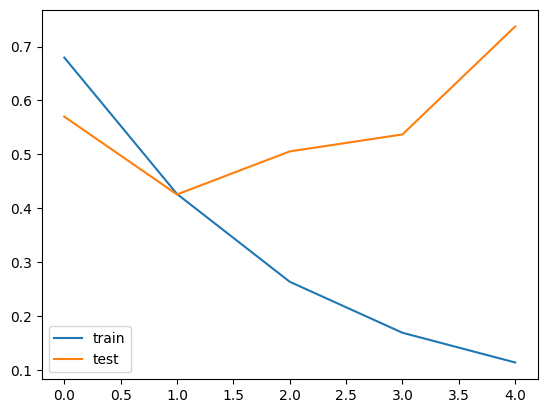

In [54]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

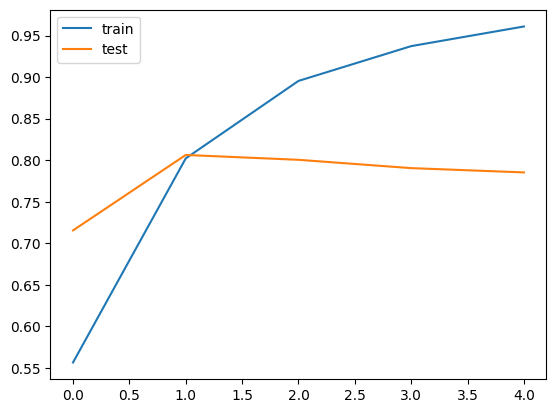

In [56]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'],label='train')
plt.plot(history.history['val_acc'],label='test')
plt.legend()
plt.show()